# Library

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np

import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.base import clone
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import cosine_similarity

# Data Preprocessing

## Import Data

In [3]:
df202109 = pd.read_csv("df_202109.csv.gz", compression="gzip", low_memory=False)
df202110 = pd.read_csv("df_202110.csv.gz", compression="gzip", low_memory=False)
df202111 = pd.read_csv("df_202111.csv.gz", compression="gzip", low_memory=False)
df202112 = pd.read_csv("df_202112.csv.gz", compression="gzip", low_memory=False)

In [4]:
df202109.head()

,yearmonth,site_id,content_id,category,price,site_prod_trx,site_prod_reorder_trx,num_package_purchased,site_trx,site_reorder_trx,num_msisdn_purchaser,prod_trx,prod_reorder_trx,reordered,rn
0,20219,ADL001,00033315,PV _ Others,8000,293,182,259,2962,815,6561387,25837086,19130037,1,1
1,20219,ADL001,00027265,CVM (BTL) _ Combo Pacman,76000,263,26,259,2962,815,2666116,2950931,222057,1,2
2,20219,ADL001,00033652,CVM (BTL) _ Combo Max,10000,174,82,259,2962,815,504069,1151358,554107,1,3
3,20219,ADL001,00033653,CVM (BTL) _ Combo Max,25000,159,58,259,2962,815,698653,1334463,522721,1,4
4,20219,ADL001,00027268,CVM (BTL) _ Combo Pacman,102000,104,8,259,2962,815,1847892,2072410,175885,1,5


In [5]:
df202110.head()

,yearmonth,site_id,content_id,category,price,site_prod_trx,site_prod_reorder_trx,num_package_purchased,site_trx,site_reorder_trx,num_msisdn_purchaser,prod_trx,prod_reorder_trx,reordered,rn
0,202110,ADL001,00033315,PV _ Others,8000.0,346,234,257,3057,802,6978661,28673619,21131967,1,1
1,202110,ADL001,00027265,CVM (BTL) _ Combo Pacman,76000.0,253,11,257,3057,802,2663499,2992160,164849,1,2
2,202110,ADL001,00033653,CVM (BTL) _ Combo Max,25000.0,188,61,257,3057,802,739072,1433812,490190,1,3
3,202110,ADL001,00033652,CVM (BTL) _ Combo Max,10000.0,166,76,257,3057,802,514678,1203330,541378,1,4
4,202110,ADL001,00027268,CVM (BTL) _ Combo Pacman,102000.0,107,8,257,3057,802,1832905,2099759,140296,1,5


In [6]:
df202111.head()

,yearmonth,site_id,content_id,category,price,site_prod_trx,site_prod_reorder_trx,num_package_purchased,site_trx,site_reorder_trx,num_msisdn_purchaser,prod_trx,prod_reorder_trx,reordered,rn
0,202111,ADL001,00033315,PV _ Others,8000,366,226,239,2950,709,7353288,30222077,20451247,1,1
1,202111,ADL001,00027265,CVM (BTL) _ Combo Pacman,76000,224,9,239,2950,709,2704443,2992455,134863,1,2
2,202111,ADL001,00033653,CVM (BTL) _ Combo Max,25000,221,64,239,2950,709,789116,1446234,433826,1,3
3,202111,ADL001,00033652,CVM (BTL) _ Combo Max,10000,156,71,239,2950,709,516483,1154864,487358,1,4
4,202111,ADL001,00027268,CVM (BTL) _ Combo Pacman,102000,106,3,239,2950,709,1683881,1877278,94579,1,5


In [7]:
df202112.head()

,yearmonth,site_id,content_id,category,price,site_prod_trx,site_prod_reorder_trx,num_package_purchased,site_trx,site_reorder_trx,num_msisdn_purchaser,prod_trx,prod_reorder_trx,reordered,rn
0,202112,ADL001,00033315,PV _ Others,8000.0,338,222,272,3299,829,7972633,34444426,24621720,1,1
1,202112,ADL001,00027265,CVM (BTL) _ Combo Pacman,76000.0,271,15,272,3299,829,2947721,3349409,178244,1,2
2,202112,ADL001,00033653,CVM (BTL) _ Combo Max,25000.0,255,87,272,3299,829,820697,1567051,486974,1,3
3,202112,ADL001,00033652,CVM (BTL) _ Combo Max,10000.0,143,58,272,3299,829,468057,1077516,443835,1,4
4,202112,ADL001,00027268,CVM (BTL) _ Combo Pacman,102000.0,120,13,272,3299,829,1610943,1841072,94865,1,5


## Split test-train

In [8]:
df_test = df202112[df202112['rn']<=50]
# noinspection PyRedeclaration
df_test = df202112.drop(["yearmonth","site_prod_reorder_trx","rn"], axis=1)

In [9]:
test_x = df_test[["site_prod_trx","num_package_purchased","site_trx","site_reorder_trx","num_msisdn_purchaser","prod_trx","prod_reorder_trx"]]

In [10]:
test_y = df_test["reordered"]

In [11]:
train = [df202109,df202110,df202111]
df_train = pd.concat(train)

In [12]:
df_train = df_train[df_train['rn']<=50]
df_train = df_train.drop(['yearmonth','site_prod_reorder_trx','rn'], axis=1)

In [13]:
df_train.head()

,site_id,content_id,category,price,site_prod_trx,num_package_purchased,site_trx,site_reorder_trx,num_msisdn_purchaser,prod_trx,prod_reorder_trx,reordered
0,ADL001,00033315,PV _ Others,8000.0,293,259,2962,815,6561387,25837086,19130037,1
1,ADL001,00027265,CVM (BTL) _ Combo Pacman,76000.0,263,259,2962,815,2666116,2950931,222057,1
2,ADL001,00033652,CVM (BTL) _ Combo Max,10000.0,174,259,2962,815,504069,1151358,554107,1
3,ADL001,00033653,CVM (BTL) _ Combo Max,25000.0,159,259,2962,815,698653,1334463,522721,1
4,ADL001,00027268,CVM (BTL) _ Combo Pacman,102000.0,104,259,2962,815,1847892,2072410,175885,1


In [14]:
count_c1, count_c0 = df_train['reordered'].value_counts()

df_c1 = df_train[df_train['reordered'] == 1]
df_c0 = df_train[df_train['reordered'] == 0]

In [15]:
count_c1

6234887

In [16]:
count_c0

2754092

In [17]:
df_c0.head()

,site_id,content_id,category,price,site_prod_trx,num_package_purchased,site_trx,site_reorder_trx,num_msisdn_purchaser,prod_trx,prod_reorder_trx,reordered
10,ADL001,00027266,CVM (BTL) _ Combo Pacman,82000.0,42,259,2962,815,519116,568256,38165,0
41,ADL001,00020214,CVM (BTL) _ Combo BAU,86000.0,13,259,2962,815,42525,46510,2889,0
43,ADL001,00027267,CVM (BTL) _ Combo Pacman,92000.0,13,259,2962,815,220053,234495,11374,0
234,ADL003,00027261,CVM (BTL) _ Combo Pacman,59000.0,20,268,2802,668,890117,988610,78687,0
242,ADL003,00013535,CVM (BTL) _ Combo BAU,76000.0,14,268,2802,668,439115,530574,69137,0


### Oversampling

Random over-sampling:
1    6234887
0    6234887
Name: reordered, dtype: int64


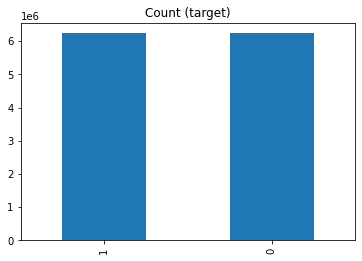

In [18]:
df_c0_over = df_c0.sample(count_c1, replace=True)
df_trains = pd.concat([df_c1, df_c0_over], axis=0)

print('Random over-sampling:')
print(df_trains['reordered'].value_counts())

df_trains['reordered'].value_counts().plot(kind='bar', title='Count (target)');

In [19]:
train_x = df_trains[["site_prod_trx","num_package_purchased","site_trx","site_reorder_trx","num_msisdn_purchaser","prod_trx","prod_reorder_trx"]]

In [20]:
train_y = df_trains['reordered']

# Modeling (XGBoost)

In [25]:
clf_xgb = xgb.XGBClassifier(use_label_encoder=False)

In [26]:
clf_xgb.fit(train_x,
            train_y,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric='auc',
            eval_set=[(test_x,test_y)]
            )

[0]	validation_0-auc:0.93238
[1]	validation_0-auc:0.93972
[2]	validation_0-auc:0.94166
[3]	validation_0-auc:0.94275
[4]	validation_0-auc:0.94359
[5]	validation_0-auc:0.94420
[6]	validation_0-auc:0.94465
[7]	validation_0-auc:0.94477
[8]	validation_0-auc:0.94504
[9]	validation_0-auc:0.94522
[10]	validation_0-auc:0.94571
[11]	validation_0-auc:0.94547
[12]	validation_0-auc:0.94578
[13]	validation_0-auc:0.94573
[14]	validation_0-auc:0.94578
[15]	validation_0-auc:0.94613
[16]	validation_0-auc:0.94595
[17]	validation_0-auc:0.94596
[18]	validation_0-auc:0.94588
[19]	validation_0-auc:0.94614
[20]	validation_0-auc:0.94620
[21]	validation_0-auc:0.94638
[22]	validation_0-auc:0.94629
[23]	validation_0-auc:0.94627
[24]	validation_0-auc:0.94652
[25]	validation_0-auc:0.94646
[26]	validation_0-auc:0.94658
[27]	validation_0-auc:0.94668
[28]	validation_0-auc:0.94667
[29]	validation_0-auc:0.94672
[30]	validation_0-auc:0.94672
[31]	validation_0-auc:0.94665
[32]	validation_0-auc:0.94663
[33]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='approx', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [27]:
y_train_pred = clf_xgb.predict_proba(train_x)[:,1]
y_test_pred = clf_xgb.predict_proba(test_x)[:,1]

print("AUC Train: {:.4f}\nAUC Valid: {:.4f}".format(roc_auc_score(train_y, y_train_pred),
                                                    roc_auc_score(test_y, y_test_pred)))

AUC Train: 0.9093
AUC Valid: 0.9475


In [28]:
# predict the target on the train dataset
predict_train = clf_xgb.predict(train_x)
print('\nTarget on train data',predict_train)


Target on train data [1 1 1 ... 0 0 0]


In [29]:
# Accuracy Score on train dataset
accuracy_train = accuracy_score(train_y,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)


accuracy_score on train dataset :  0.8230444272686899


In [30]:
# predict the target on the test dataset
predict_test = clf_xgb.predict(test_x)
print('\nTarget on test data',predict_test)


Target on test data [1 1 1 ... 0 0 0]


In [31]:
# Accuracy Score on test dataset
accuracy_test = accuracy_score(test_y,predict_test)
print('\naccuracy_score on test dataset : ', accuracy_test)


accuracy_score on test dataset :  0.864154657560014


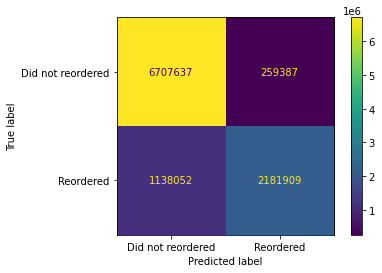

In [32]:
plot_confusion_matrix(clf_xgb,
                      test_x,
                      test_y,
                      values_format='d',
                      display_labels=["Did not reordered", "Reordered"])

In [33]:
print(classification_report(predict_test, test_y))

              precision    recall  f1-score   support

           0       0.96      0.85      0.91   7845689
           1       0.66      0.89      0.76   2441296

    accuracy                           0.86  10286985
   macro avg       0.81      0.87      0.83  10286985
weighted avg       0.89      0.86      0.87  10286985



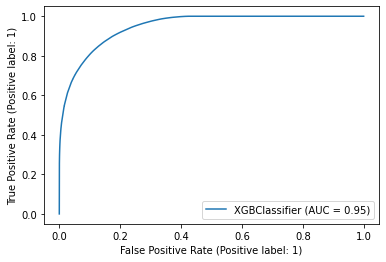

In [34]:
metrics.plot_roc_curve(clf_xgb, test_x, test_y)

## Hyperparameter tuning

In [35]:
%%script skip
learning_rate_list = [0.02, 0.05, 0.1]
max_depth_list = [2, 3, 5]
n_estimators_list = [1000, 2000, 3000]

params_dict = {"learning_rate": learning_rate_list,
               "max_depth": max_depth_list,
               "n_estimators": n_estimators_list}

num_combinations = 1
for v in params_dict.values(): num_combinations *= len(v)

print(num_combinations)
params_dict

Couldn't find program: 'skip'


In [36]:
%%script skip

def my_roc_auc_score(model, train_x, train_y): return roc_auc_score(train_y, model.predict_proba(train_x)[:,1])

model_xgboost_hp = GridSearchCV(estimator=xgb.XGBClassifier(subsample=0.5,
                                                            colsample_bytree=0.25,
                                                            eval_metric='auc',
                                                            use_label_encoder=False),
                                param_grid=params_dict,
                                cv=2,
                                scoring=my_roc_auc_score,
                                return_train_score=True,
                                verbose=4)

model_xgboost_hp.fit(train_x, train_y)

Couldn't find program: 'skip'


## Probability

In [37]:
# predict the target on the test dataset
predict_test_proba = clf_xgb.predict_proba(test_x)[:, 1]
print('\nTarget on test data',predict_test_proba)


Target on test data [9.9987543e-01 9.8502362e-01 9.9978620e-01 ... 5.4356973e-05 7.1299924e-05
 7.3440329e-05]


In [39]:
df_pred = pd.DataFrame(predict_test_proba)
df_pred.columns = ["probability"]
df_pred.shape

(10286985, 1)

In [40]:
df_finals = df_test
df_finals.head()

,site_id,content_id,category,price,site_prod_trx,num_package_purchased,site_trx,site_reorder_trx,num_msisdn_purchaser,prod_trx,prod_reorder_trx,reordered
0,ADL001,00033315,PV _ Others,8000.0,338,272,3299,829,7972633,34444426,24621720,1
1,ADL001,00027265,CVM (BTL) _ Combo Pacman,76000.0,271,272,3299,829,2947721,3349409,178244,1
2,ADL001,00033653,CVM (BTL) _ Combo Max,25000.0,255,272,3299,829,820697,1567051,486974,1
3,ADL001,00033652,CVM (BTL) _ Combo Max,10000.0,143,272,3299,829,468057,1077516,443835,1
4,ADL001,00027268,CVM (BTL) _ Combo Pacman,102000.0,120,272,3299,829,1610943,1841072,94865,1


In [41]:
df_finals.shape

(10286985, 12)

In [42]:
df_finals["propensity_score"] = predict_test_proba
df_finals.head()

,site_id,content_id,category,price,site_prod_trx,num_package_purchased,site_trx,site_reorder_trx,num_msisdn_purchaser,prod_trx,prod_reorder_trx,reordered,propensity_score
0,ADL001,00033315,PV _ Others,8000.0,338,272,3299,829,7972633,34444426,24621720,1,0.999875
1,ADL001,00027265,CVM (BTL) _ Combo Pacman,76000.0,271,272,3299,829,2947721,3349409,178244,1,0.985024
2,ADL001,00033653,CVM (BTL) _ Combo Max,25000.0,255,272,3299,829,820697,1567051,486974,1,0.999786
3,ADL001,00033652,CVM (BTL) _ Combo Max,10000.0,143,272,3299,829,468057,1077516,443835,1,0.999804
4,ADL001,00027268,CVM (BTL) _ Combo Pacman,102000.0,120,272,3299,829,1610943,1841072,94865,1,0.967394


In [43]:
df_finals["content_id"].fillna(0, inplace=True)

In [44]:
df_finals['rn'] = df_finals.sort_values(["propensity_score"], ascending=False).groupby(['site_id']).cumcount() + 1

In [45]:
df_finals.head()

,site_id,content_id,category,price,site_prod_trx,num_package_purchased,site_trx,site_reorder_trx,num_msisdn_purchaser,prod_trx,prod_reorder_trx,reordered,propensity_score,rn
0,ADL001,00033315,PV _ Others,8000.0,338,272,3299,829,7972633,34444426,24621720,1,0.999875,1
1,ADL001,00027265,CVM (BTL) _ Combo Pacman,76000.0,271,272,3299,829,2947721,3349409,178244,1,0.985024,22
2,ADL001,00033653,CVM (BTL) _ Combo Max,25000.0,255,272,3299,829,820697,1567051,486974,1,0.999786,4
3,ADL001,00033652,CVM (BTL) _ Combo Max,10000.0,143,272,3299,829,468057,1077516,443835,1,0.999804,3
4,ADL001,00027268,CVM (BTL) _ Combo Pacman,102000.0,120,272,3299,829,1610943,1841072,94865,1,0.967394,27


In [46]:
df_finals.shape

(10286985, 14)

In [47]:
# noinspection SpellCheckingInspection
df_final = df_finals[df_finals["rn"]<=20]

In [48]:
df_final.shape

(1248589, 14)

In [49]:
rep_atl_result = df_final
rep_atl_result.head()

,site_id,content_id,category,price,site_prod_trx,num_package_purchased,site_trx,site_reorder_trx,num_msisdn_purchaser,prod_trx,prod_reorder_trx,reordered,propensity_score,rn
0,ADL001,00033315,PV _ Others,8000.0,338,272,3299,829,7972633,34444426,24621720,1,0.999875,1
2,ADL001,00033653,CVM (BTL) _ Combo Max,25000.0,255,272,3299,829,820697,1567051,486974,1,0.999786,4
3,ADL001,00033652,CVM (BTL) _ Combo Max,10000.0,143,272,3299,829,468057,1077516,443835,1,0.999804,3
5,ADL001,00033673,CVM (BTL) _ Combo Max,25000.0,105,272,3299,829,1104175,1737946,407015,1,0.999657,5
6,ADL001,00013546,CVM (BTL) _ Combo BAU,91000.0,80,272,3299,829,236084,352634,63171,1,0.996062,12


# Result Export

In [50]:
rep_atl_result.to_csv('package_repurchased_result_atl.csv.gz', header=True, index=False, compression="gzip")

In [63]:
df_result=pd.read_csv("package_repurchased_result_atl.csv.gz", compression="gzip", low_memory=False)

# DRAFT

## Cosine Similarity

### Dataset Creation

In [51]:
df202112.head()

,yearmonth,site_id,content_id,category,price,site_prod_trx,site_prod_reorder_trx,num_package_purchased,site_trx,site_reorder_trx,num_msisdn_purchaser,prod_trx,prod_reorder_trx,reordered,rn
0,202112,ADL001,00033315,PV _ Others,8000.0,338,222,272,3299,829,7972633,34444426,24621720,1,1
1,202112,ADL001,00027265,CVM (BTL) _ Combo Pacman,76000.0,271,15,272,3299,829,2947721,3349409,178244,1,2
2,202112,ADL001,00033653,CVM (BTL) _ Combo Max,25000.0,255,87,272,3299,829,820697,1567051,486974,1,3
3,202112,ADL001,00033652,CVM (BTL) _ Combo Max,10000.0,143,58,272,3299,829,468057,1077516,443835,1,4
4,202112,ADL001,00027268,CVM (BTL) _ Combo Pacman,102000.0,120,13,272,3299,829,1610943,1841072,94865,1,5


In [52]:
similarity = df202112.groupby(['site_id','category','price'])\
    .agg({'site_prod_trx': 'sum'})\
    .rename(columns={'site_prod_trx': 'sum_trx'})

similarity.columns = similarity.columns.map(''.join)
similarity = similarity.reset_index()

similarity['cat']=similarity['category'].str.replace(' ', '')
similarity.head()

,site_id,category,price,sum_trx,cat
0,ADL001,Bundling _ Orbit,10000.0,1,Bundling_Orbit
1,ADL001,Bundling _ Orbit,30000.0,7,Bundling_Orbit
2,ADL001,Bundling _ Orbit,80000.0,4,Bundling_Orbit
3,ADL001,Bundling _ Orbit,175000.0,3,Bundling_Orbit
4,ADL001,CVM (BTL) _ 4G,10000.0,49,CVM(BTL)_4G


In [53]:
def denom_range(x):
    if (x >= 1000) and (x <= 2500):
        return 'deno_1000_2500'
    elif (x > 2500) and (x <= 5000):
        return 'deno_2500_5000'
    elif (x > 5000) and (x <= 7500):
        return 'deno_5000_7500'
    elif (x > 7500) and (x <= 10000):
        return 'deno_7500_10000'
    elif (x > 10000) and (x <= 12500):
        return 'deno_10000_12500'
    elif (x > 12500) and (x <= 15000):
        return 'deno_12500_15000'
    elif (x > 15000) and (x <= 20000):
        return 'deno_15000_20000'
    elif (x > 20000) and (x <= 25000):
        return 'deno_20000_25000'
    elif (x > 25000) and (x <= 30000):
        return 'deno_25000_30000'
    elif (x > 30000) and (x <= 35000):
        return 'deno_30000_35000'
    elif (x > 35000) and (x <= 40000):
        return 'deno_35000_40000'
    elif (x > 40000) and (x <= 45000):
        return 'deno_40000_45000'
    elif (x > 45000) and (x <= 50000):
        return 'deno_45000_50000'
    elif (x > 50000) and (x <= 75000):
        return 'deno_50000_75000'
    elif (x > 75000) and (x <= 100000):
        return 'deno_75000_100000'
    elif (x > 100000) and (x <= 125000):
        return 'deno_100000_125000'
    elif (x > 125000) and (x <= 150000):
        return 'deno_125000_150000'
    elif (x > 150000) and (x <= 175000):
        return 'deno_150000_175000'
    elif (x > 175000) and (x <= 200000):
        return 'deno_175000_200000'
    elif (x > 200000) and (x <= 300000):
        return 'deno_200000_300000'
    else:
        return 'deno_abv_300000'

similarity['denom'] = similarity['price'].apply(denom_range)
similarity.head()

,site_id,category,price,sum_trx,cat,denom
0,ADL001,Bundling _ Orbit,10000.0,1,Bundling_Orbit,deno_7500_10000
1,ADL001,Bundling _ Orbit,30000.0,7,Bundling_Orbit,deno_25000_30000
2,ADL001,Bundling _ Orbit,80000.0,4,Bundling_Orbit,deno_75000_100000
3,ADL001,Bundling _ Orbit,175000.0,3,Bundling_Orbit,deno_150000_175000
4,ADL001,CVM (BTL) _ 4G,10000.0,49,CVM(BTL)_4G,deno_7500_10000


In [54]:
similarity = similarity[['site_id','cat','denom','sum_trx']]
similarity.head()

,site_id,cat,denom,sum_trx
0,ADL001,Bundling_Orbit,deno_7500_10000,1
1,ADL001,Bundling_Orbit,deno_25000_30000,7
2,ADL001,Bundling_Orbit,deno_75000_100000,4
3,ADL001,Bundling_Orbit,deno_150000_175000,3
4,ADL001,CVM(BTL)_4G,deno_7500_10000,49


In [55]:
similarity_cat = similarity.pivot_table(index='site_id', columns='cat', values='sum_trx', fill_value=0, aggfunc='sum').round(decimals=0)

similarity_den = similarity.pivot_table(index='site_id', columns='denom', values='sum_trx', fill_value=0, aggfunc='sum').round(decimals=0)

similarity_total = df202112.groupby(['site_id']).agg({'content_id': 'nunique', 'site_prod_trx': 'sum' }).rename(columns={'content_id': 'package_purchased', 'site_prod_trx': 'tot_trx'})

df_sim = similarity_total.merge(similarity_cat, on='site_id', how='left').merge(similarity_den, on='site_id', how='left')
df_sim = df_sim.reset_index()
df_sim.head()

,site_id,package_purchased,tot_trx,Bundling_Orbit,Bundling_Others,CVM(BTL)_4G,CVM(BTL)_Churn,CVM(BTL)_ComboBAU,CVM(BTL)_ComboMax,CVM(BTL)_ComboPacman,...,deno_2500_5000,deno_30000_35000,deno_35000_40000,deno_40000_45000,deno_45000_50000,deno_50000_75000,deno_5000_7500,deno_75000_100000,deno_7500_10000,deno_abv_300000
0,ADL001,225,3054,15,0,87,46,228,746,486,...,114,126,106,11,93,140,10,600,868,1
1,ADL003,262,3404,10,0,103,48,340,774,734,...,109,143,116,11,191,242,32,961,510,0
2,ADL005,285,5960,8,0,150,73,413,1748,1038,...,239,286,207,16,320,338,18,1296,1312,0
3,ADL006,190,1855,0,0,88,24,189,413,345,...,82,124,55,4,101,125,11,527,277,1
4,ADL007,211,2683,4,0,75,33,264,734,502,...,65,98,94,11,188,159,1,717,417,0


In [56]:
df_sim[(df_sim['site_id'] == 'KRW092') | (df_sim['site_id'] == 'YOG002')]

,site_id,package_purchased,tot_trx,Bundling_Orbit,Bundling_Others,CVM(BTL)_4G,CVM(BTL)_Churn,CVM(BTL)_ComboBAU,CVM(BTL)_ComboMax,CVM(BTL)_ComboPacman,...,deno_2500_5000,deno_30000_35000,deno_35000_40000,deno_40000_45000,deno_45000_50000,deno_50000_75000,deno_5000_7500,deno_75000_100000,deno_7500_10000,deno_abv_300000
25558,KRW092,190,2071,0,1,12,7,9,87,185,...,167,34,35,5,44,90,48,103,968,0
63104,YOG002,331,3365,15,0,73,12,127,369,368,...,214,150,116,20,172,407,39,458,604,0


### df_similarity export

In [57]:
df_sim.to_csv('df_sim.csv.gz', header=True, index=False, compression="gzip")

In [58]:
df_sim = pd.read_csv("df_sim.csv.gz", compression="gzip", low_memory=False)

### Modeling

In [59]:
df_compute = df_sim.drop('site_id', axis=1)
df_compute.head()

,package_purchased,tot_trx,Bundling_Orbit,Bundling_Others,CVM(BTL)_4G,CVM(BTL)_Churn,CVM(BTL)_ComboBAU,CVM(BTL)_ComboMax,CVM(BTL)_ComboPacman,CVM(BTL)_ComboZoning,...,deno_2500_5000,deno_30000_35000,deno_35000_40000,deno_40000_45000,deno_45000_50000,deno_50000_75000,deno_5000_7500,deno_75000_100000,deno_7500_10000,deno_abv_300000
0,225,3054,15,0,87,46,228,746,486,166,...,114,126,106,11,93,140,10,600,868,1
1,262,3404,10,0,103,48,340,774,734,306,...,109,143,116,11,191,242,32,961,510,0
2,285,5960,8,0,150,73,413,1748,1038,385,...,239,286,207,16,320,338,18,1296,1312,0
3,190,1855,0,0,88,24,189,413,345,164,...,82,124,55,4,101,125,11,527,277,1
4,211,2683,4,0,75,33,264,734,502,251,...,65,98,94,11,188,159,1,717,417,0


In [60]:
cosine_sim = cosine_similarity(df_compute)
cosine_sim.head()

MemoryError: Unable to allocate 30.3 GiB for an array with shape (63744, 63744) and data type float64

In [62]:
indices = pd.Series(df_sim.index, index=df_sim['site_id']).drop_duplicates()

In [63]:
store=[]
for site in df_sim['site_id'].drop_duplicates().to_list():
    # Get the index of the movie that matches the title
    idx = indices[site]

    # Get the pairwsie similarity scores of all sites with that site
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the sites based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 5 most similar movies
    sim_scores = sim_scores[1:6]

    # Get the site indices
    site_indices = [i[0] for i in sim_scores]

    # Get the site similarity values
    site_sim_value = [i[1] for i in sim_scores]

    # Get Most Similar Site
    most_sim_site = df_sim['site_id'].iloc[site_indices[0]]

    # Get Similarity Value of Most Similar Site
    sim_score = site_sim_value[0]

    # Create dataframe
    site_id = [site]
    most_similar_site = [most_sim_site]
    similarity_score = [sim_score]
    similarity_dict = {'site_id':site_id, 'most_similar_site':most_similar_site, 'similarity_score':similarity_score}
    df_new = pd.DataFrame(similarity_dict)

    store.append(df_new)

df_store = pd.concat(store)

NameError: name 'cosine_sim' is not defined

In [65]:
df_result_sim = df_store

NameError: name 'df_store' is not defined

In [ ]:
%%script draft-split-cat

for site in sites:
    exec(f"{site} = df_sim1[df_sim1['site_id']==site].reset_index(drop=True)")

for site in sites:
    exec(f"{site} = {site}.drop(['site_id'], axis=1)")